In [1]:
from astropy.io  import fits
import numpy as np
import matplotlib.pyplot as plt

**FITS** son las siglas de Felxible Image Transport System. Son un estandar en astronomía para el almacenamiento de datos científicos. 

Un archivo FITS tiene:

- **Encabezado (header):** Contiene metadatos
- **Datos:** matriz con valores que representan imágenes, cubos, espectros o tablas

In [9]:
image = 'V444Cyg0004a.fits' # Esta línea guarda el nombre del archivo FITS que se va a abrir
print (image)
hdul = fits.open(image) # Esta línea abre el archivo FITS y lo guarda en la variable hdul
print (hdul.info()) # Esta línea imprime información sobre el archivo FITS
hdul.info() #Esta reemplaza la línea anterior para mostrar información detallada sobre el archivo FITS

V444Cyg0004a.fits
Filename: V444Cyg0004a.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      82   (2048, 2048)   int16 (rescales to uint16)   
None
Filename: V444Cyg0004a.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      82   (2048, 2048)   int16 (rescales to uint16)   


In [18]:
hdul[0].header # Esta línea muestra la información del encabezado del archivo FITSt
list(hdul[0].header.keys()) # Esta línea convierte las claves del encabezado en una lista para que se puedan ver todas las claves disponibles

print(hdul[0].header['TELESCOP']) # Esta línea muestra el valor de la clave 'Telescope' en el encabezado del archivo FITS
print(hdul[0].header['JD']) # Esta línea muestra el valor de la clave 'JD' en el encabezado del archivo FITS

2.12m
2460556.699444444


In [ ]:
hdul[0].data # Esta línea muestra los datos del archivo FITS
np.shape(hdul[0].data) # Dimensiones de los datos del archivo FITS

array([[506, 508, 507, ..., 507, 507, 504],
       [514, 514, 514, ..., 512, 510, 513],
       [516, 515, 518, ..., 513, 510, 513],
       ...,
       [522, 528, 524, ..., 521, 517, 515],
       [521, 519, 525, ..., 520, 519, 516],
       [520, 522, 525, ..., 516, 515, 513]], dtype=uint16)

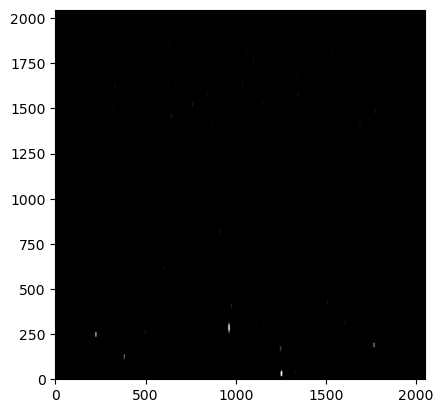

In [ ]:
plt.imshow(hdul[0].data, origin= 'lower', cmap='gray') # plotea los datos del archivo FITS como una imagen en escala de grises

La imágen anterior nos muestra una lampara de calibración de **ThAr** posterior a la observación del sistema V444 Cyg. Sin embargo, la imagen no se ve muy bien, miraremos el histograma para así elegir un mejo intervalo y observar más detalles.

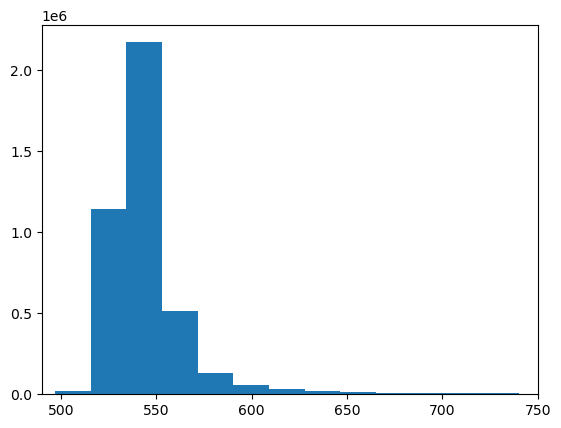

In [33]:
plt.hist(hdul[0].data.flatten(), bins='scott')
plt.xlim(490,750)
#plt.ylim(0,1000)
plt.show()

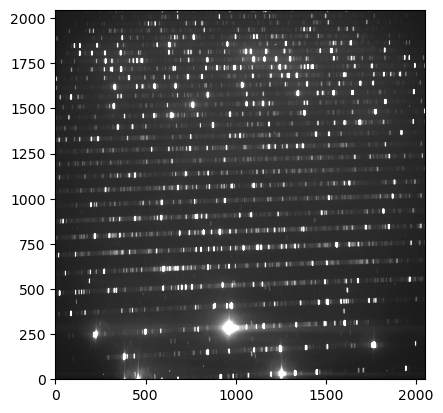

In [35]:
plt.imshow(hdul[0].data, origin= 'lower', cmap='gray', vmin=490, vmax=750) # plotea los datos del archivo FITS como una imagen en escala de grises con un intervalo de valores específico

Se visibiliza que la imagen mejora mucho siendo mostrada solo en el rango que contiene la mayor parte de información.

**Ahora exploraremos como cargar y graficar espectros 1D con astropy.io**
